# Introducing Langgraph
 * Langgraph, works like a flowchart for AI

## Nodes
* Steps (functions that do work)

## Edges 
* Paths (rules that decide which step comes next)

## Workflow 
* The whole graph that runs your AI logic 

### Step1- Imports & State

In [15]:
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel
from typing import Annotated
from langgraph.graph.message import add_messages
import random

In [11]:
## State object :Where all information lives
class State(BaseModel):
    messages : Annotated[list,add_messages] # Reducer appends new messages

# Step 2 : Define Nodes

## A Node = Function that takes State and Returns State

In [13]:
# Node 1
def greeter(state: State) -> State:
    msg = f"Hello! I am your graph assistant."
    return {"messages": [msg]}

# Node 2
def random_fact(state: State) -> State:
    facts = [
        "Bananas are berries, but strawberries are not.",
        "Octopuses have three hearts.",
        "Penguins propose with pebbles.",
        "Cabbages have more chromosomes than humans!"
    ]
    fact = random.choice(facts)
    msg = f"Did you know? {fact}"
    return {"messages": [msg]}

# Node 3
def farewell(state: State) -> State:
    msg = f"Goodbye! Graph run complete."
    return {"messages": [msg]}

In [10]:
def poke(name: Annotated[str, "Something to be Poked"]) -> str:
    return f"You poked {name.upper()}!"

poke("Peter")

'You poked PETER!'

# Step 3 :Build the Graph (Nodes + Edges)

In [16]:
# Build the graph
graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node("greeter", greeter)
graph_builder.add_node("random_fact", random_fact)
graph_builder.add_node("farewell", farewell)


# Connect nodes with edges
graph_builder.add_edge(START, "greeter")
graph_builder.add_edge("greeter", "random_fact")
graph_builder.add_edge("random_fact", "farewell")
graph_builder.add_edge("farewell", END)


# Step 4: Compile & Run

In [19]:
# Compile the graph
graph = graph_builder.compile()

# Run with empty state
initial_state = {"messages": []}
final_state = graph.invoke(initial_state)

print("=== Final Output ===")
for m in final_state["messages"]:
    print(m)

=== Final Output ===
content='Hello! I am your graph assistant.' additional_kwargs={} response_metadata={} id='27ca7002-e637-43c1-85af-042cc1640fba'
content='Did you know? Cabbages have more chromosomes than humans!' additional_kwargs={} response_metadata={} id='bcf67657-2383-490b-9750-3896461b0284'
content='Goodbye! Graph run complete.' additional_kwargs={} response_metadata={} id='c32db295-5d24-4ab8-812f-24190507740e'


# Display the Graph Layout

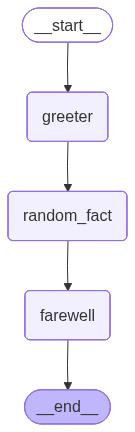

In [20]:
# Visualize graph (requires graphviz)
from IPython.display import Image

display(Image(graph.get_graph().draw_mermaid_png()))